### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import mpl_toolkits as mplot3d
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Defining the Model

In [2]:
class KMeans:
    def __init__(self, k):
        self.k = k
    
    def fit(self, X):
        self.centroids = np.copy(X[:self.k, :])
        sse = None
        prev_assigned = None
        assigned_cluster = np.zeros((X.shape[0],))
        
        while True:
            sse = 0.0
            prev_assigned = assigned_cluster
            assigned_cluster = np.zeros((X.shape[0],))
            
            for i, x in enumerate(X):
                dist = np.linalg.norm(x-self.centroids, axis=1)
                min_clust = np.argmin(dist)
                assigned_cluster[i] = min_clust
                sse += dist[min_clust]
                
            if np.sum(prev_assigned != assigned_cluster) == 0:
                break
            
            for i in range(self.k):
                self.centroids[i] = np.mean(X[assigned_cluster == i], axis=0)
            
        return sse

    def predict(self, X):
        assigned_cluster = np.zeros((X.shape[0],))
            
        for i, x in enumerate(X):
            dist = np.linalg.norm(x-self.centroids, axis=1)
            assigned_cluster[i] = np.argmin(dist)
            
        return assigned_cluster

### Importing the Data

In [3]:
df = pd.read_csv('data1.csv')

df.head()

,points,assists,rebounds
0,18,3,15
1,19,4,14
2,14,5,10
3,14,4,8
4,11,7,14


### Data Visualization

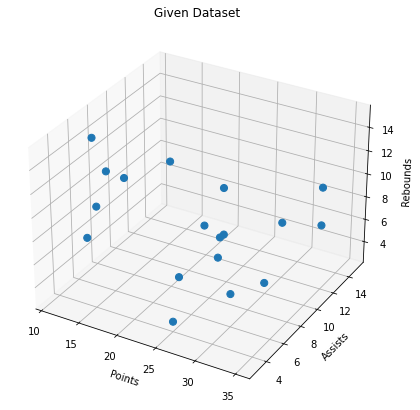

In [4]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

ax.scatter3D(df['points'], df['assists'], df['rebounds'], marker='.', s=200, alpha=1)
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
plt.title('Given Dataset')
plt.show()

### Data Preprocessing

In [5]:
X = df.values

In [6]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

### Training the KMeans Model for Different Values of K

In [7]:
N = len(X)

In [8]:
K = np.arange(1, N+1)
SSE = np.zeros_like(K)

In [9]:
for i, k in enumerate(K):
    model = KMeans(k)
    SSE[i] = model.fit(X)

### Plot the Graph between k(Number of Clusters) and Sum Squared Error(SSE)

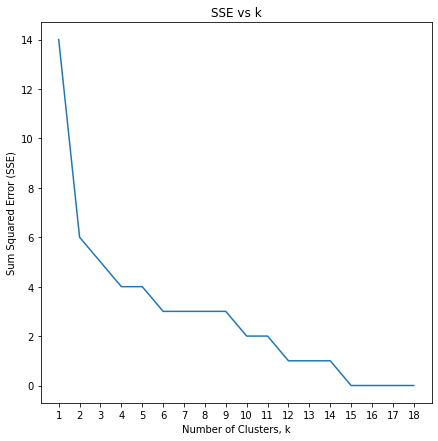

In [10]:
plt.figure(figsize=(7, 7))
plt.plot(K, SSE)
plt.xticks(K)
plt.xlabel('Number of Clusters, k')
plt.ylabel('Sum Squared Error (SSE)')
plt.title('SSE vs k')
plt.show()

### Train a model with the optimal k using Elbow Method and plot the clusters found

In [11]:
model = KMeans(4)
model.fit(X)

pred = model.predict(X)

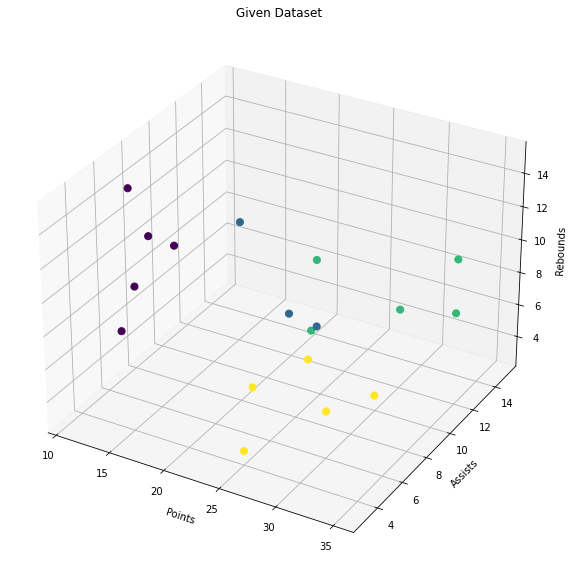

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.scatter3D(df['points'], df['assists'], df['rebounds'], c=pred, marker='.', s=200, alpha=1)
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
plt.title('Given Dataset')
plt.show()